In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../src")
from analysis import GEM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df1 = pd.read_csv(
    "../data/pct_fed_intmodel_simpleadaptations_rationing_humans.csv", comment="#"
)
df2 = pd.read_csv("../results/solar+wind-NW-year1.csv")

In [10]:
df = pd.merge(df1, df2, how="outer", left_on="country_name", right_on="country")

In [11]:
df["continent"] = df["continent"].astype("category")

In [19]:
color_map = {
    "Africa": "#3A913F",
    "Asia": "#6c7075",
    "Europe": "#e06234",
    "North America": "#F0B323",
    "Oceania": "#3D87CB",
    "South America": "#89b587",
    "default": "#000000",
}

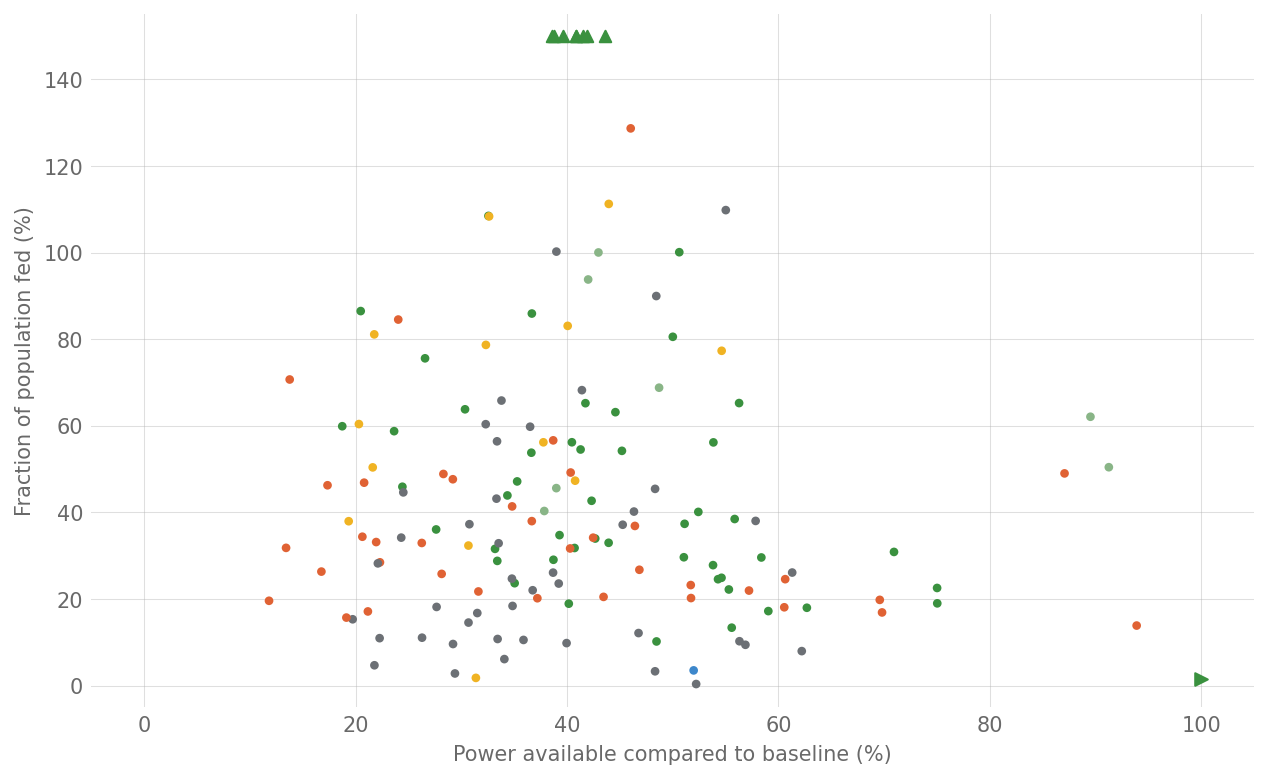

In [26]:
outlier_threshold_y = 150
outlier_threshold_x = 100

x_var = "solar+wind_pct_NW"
y_var = "pct_fed"

outliers_y = df[df[y_var] > outlier_threshold_y]
outliers_x = df[df[x_var] > outlier_threshold_x]

# Filter out the main data points
df_filtered = df[
    (df[y_var] <= outlier_threshold_y) & (df[x_var] <= outlier_threshold_x)
]

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Regular scatter plot
plt.scatter(
    df_filtered[x_var], df_filtered[y_var], c=df_filtered["continent"].map(color_map), s=40
)

# Outliers as upward arrows
plt.scatter(
    outliers_y[x_var],
    np.minimum(outlier_threshold_y, outliers_y[y_var]),
    c=outliers_y["continent"].map(color_map),
    marker="^",
    color="#3A913F",
    s=30,
)

# Outliers as rightward arrows
plt.scatter(
    np.minimum(outlier_threshold_x, outliers_x[x_var]),
    outliers_x[y_var],
    c=outliers_x["continent"].map(color_map),
    marker=">",
    color="#3A913F",
)

plt.xlabel("Power available compared to baseline (%)")
plt.ylabel("Fraction of population fed (%)")
plt.grid(True)
plt.xlim(-5, outlier_threshold_x + 5)
plt.ylim(-5, outlier_threshold_y + 5)
plt.show()

In [27]:
outliers_x

,country_name,country_code,pct_fed,Unnamed: 0,country,solar_contribution_baseline,wind_contribution_baseline,total_power_baseline_GW,solar_fraction_NW,wind_fraction_NW,solar+wind_fraction_NW,solar+wind_pct_NW
136,Singapore,SGP,1.53,112.0,Singapore,0.016614,0.983386,61.6,0.406948,1.5157,1.49728,149.72799
